# Regression

Regression is set of statistical processes to estimate the value of the variables. 

In [4]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
path = os.getcwd() + '/ex1data1.txt'
print (path)
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])  
data.head()

/home/rahul/home/Python/ml/MachineLearning/1.Regression/ex1data1.txt


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


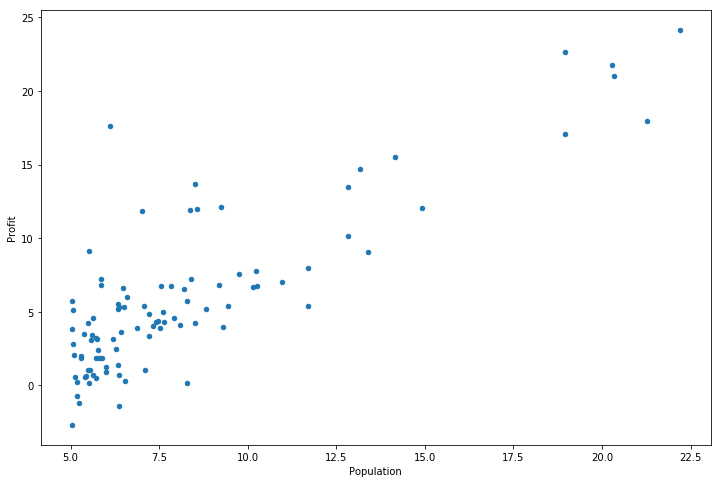

In [7]:
data.plot( kind ='scatter' , x='Population' , y='Profit', figsize = (12,8) )

In [8]:
def computeCost( x , y, theta ):
    error = np.power( X *  theta.T  - y  , 2)
    return np.sum(error)/ (2 * len(X))

In [9]:
data.insert( 0 , 'Ones' , 1 )

In [13]:
cols = data.shape[1]
print ( cols)

3


In [46]:
X =  data.iloc[ : , 0 :cols-1 ]
Y = data.iloc[: , cols-1: cols]
print ( X . shape , Y .shape)

(97, 2) (97, 1)


In [47]:
X = np.matrix(  X.values )
Y = np.matrix(  Y.values )
theta = np.matrix ( np.array([0,0]))
theta.shape , X.shape , Y.shape

((1, 2), (97, 2), (97, 1))

In [19]:
l =   np.array([0,0])
l.shape

(2,)

In [24]:
theta.T.shape

(2, 1)

In [26]:
computeCost( X , Y ,theta)

32.072733877455676

In [51]:
def GradientDescent(x , y , theta ,alpha , iters ) :
    temp = np.matrix( np.zeros(theta.shape))
    parameters = int( theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    
    for i in range( iters) :
        error = x * theta.T - y
        
        for j in range( parameters ) :
            term = np.multiply( error , x[: , j])
            temp[0, j] = theta[0,j] - (alpha/( len(x))) * np.sum(term)
        theta = temp
        cost[i] = computeCost( x , y , theta )
        
    return theta , cost


In [55]:
# initialize variables for learning rate and iterations
alpha = 0.01  
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = GradientDescent(X, Y, theta, alpha, iters)  
# print ( g, cost)
computeCost( X , Y , g)

4.5159555030789118

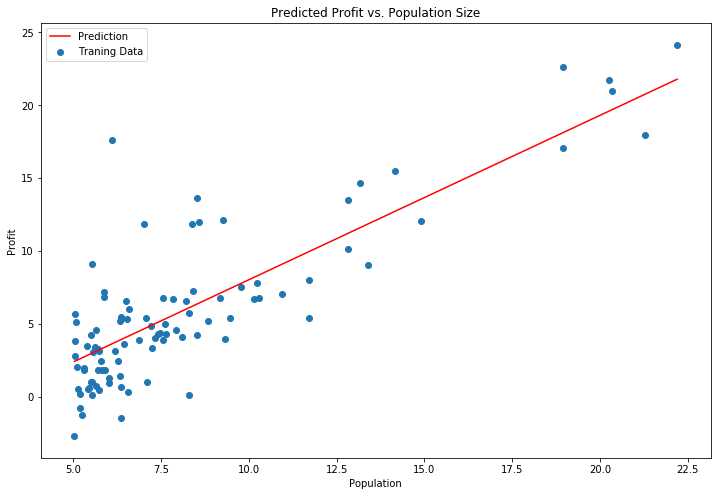

In [56]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  

In [ ]:
n